In [11]:
import  numpy as np
from typing import Union
class LinearReg:
    def __init__(self, x_arr:list, y_arr:list , slope:int=None , y_intercept:int = None) -> None:
        self.slope = slope
        self.y_intercept = y_intercept
        self.x_arr = x_arr
        self.y_arr = y_arr
        self.x_mean = sum(x_arr) / len(self.x_arr)
        self.y_mean = sum(y_arr) / len(self.y_arr)
        self.ols_numerator:int = None
        self.ols_denominator:int = None
        
    def center_data(self, arr:list) -> list:
        centered_datapoint_arr = []
        for num in arr:
            centered_data_point = num - self.x_mean
            centered_datapoint_arr.append(centered_data_point)

        return centered_datapoint_arr

    def get_slope(self) -> float:
        self.ols_numerator = np.sum(np.array(self.center_data(self.x_arr)) * np.array(self.center_data(self.y_arr)))
     
        self.ols_denominator = np.sum(np.array(self.center_data(self.x_arr))**2)
 
        slope = self.ols_numerator/self.ols_denominator
        self.slope = slope
        return slope
    
    def get_intercept(self) -> float:
     
        y_intercept = self.y_mean - (self.slope*self.x_mean)
        self.y_intercept = y_intercept
        return self.y_intercept
    
    def predict(self, independent_var:list) -> Union[int,list]:
        target = (self.slope*independent_var) + self.y_intercept
     
        return target


#18 20
linReg = LinearReg([7, 8, 10, 12, 15], [9, 10, 12, 13, 16])
linReg.get_slope()
linReg.get_intercept()
print(linReg.predict(7))


9.111650485436893


read and Access dataset.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split


database_path = 'C:/Users/doluw/OneDrive/Documents/income.data.csv'

#Specifying columns to work with
use_columns = ['income', 'happiness']
#load dataset
df = pd.read_csv(database_path, usecols=use_columns)

X_df = df.drop('happiness', axis=1) #only include independent variable
y_df = df['happiness'] # Target variables
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
print( x_test, y_test)


       income
487  4.243873
73   2.864664
231  4.223554
175  2.274523
237  2.210696
..        ...
247  5.964058
383  4.851314
19   1.994275
321  4.800344
331  6.250302

[100 rows x 1 columns] 487    4.754168
73     4.159609
231    2.295700
175    2.311554
237    2.861274
         ...   
247    3.427723
383    3.835578
19     2.584729
321    2.842868
331    4.939259
Name: happiness, Length: 100, dtype: float64


Train using Linear_regression algorithm, and try to perform prediction with it.

In [4]:
linear_reg = LinearReg(x_train.values,y_train.values )
linear_reg.get_slope()
linear_reg.get_intercept()
print(linear_reg.predict(x_test.values))

[[3.21752987]
 [2.21792257]
 [3.20280332]
 [1.79020704]
 [1.74394749]
 [2.39018719]
 [4.44664262]
 [4.86010664]
 [1.89050708]
 [3.50456863]
 [4.09833273]
 [2.4318678 ]
 [2.85594355]
 [3.54519132]
 [2.78796716]
 [1.80768864]
 [2.52124048]
 [5.16673969]
 [2.45094439]
 [3.996441  ]
 [1.83486036]
 [2.72998006]
 [2.63135811]
 [1.23340488]
 [4.61112137]
 [1.72884986]
 [2.46409207]
 [5.3782968 ]
 [4.21884267]
 [4.12789401]
 [1.34529138]
 [3.72063824]
 [2.83545189]
 [3.71043375]
 [4.0008309 ]
 [4.01012804]
 [1.2713695 ]
 [2.47646914]
 [1.31859325]
 [2.24910091]
 [5.35598486]
 [4.42244764]
 [5.0893214 ]
 [4.83614181]
 [2.94122983]
 [2.15161714]
 [1.6263909 ]
 [3.16872379]
 [2.67722482]
 [1.46401227]
 [4.0291672 ]
 [2.98869745]
 [5.14038236]
 [3.7164133 ]
 [3.58847209]
 [3.3425148 ]
 [3.54804131]
 [3.94616611]
 [4.93059286]
 [3.81954393]
 [4.89818897]
 [1.55970378]
 [5.09603988]
 [2.34495858]
 [2.2134292 ]
 [5.38998089]
 [4.72238072]
 [3.7692388 ]
 [2.40771063]
 [5.32646295]
 [4.52828042]
 [3.42

In [5]:
def linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    print(f'X_arr after mean: {X- x_mean}, y_arr after subtracting mean {Y - y_mean}')
    numerator = np.sum((X - x_mean) * (y - y_mean))
    print(f'This is the nummerator: {numerator}')
    denominator = np.sum((X - x_mean) ** 2)
    print(f'This is the denominator: {denominator}')
    m = numerator / denominator
    b = y_mean - (m * x_mean)
    print(f'Slope is :{m}, y-intercept is: {b}')
    return m, b

X = np.array([7, 8, 10, 12, 15, 18])
Y = np.array([9, 10, 12, 13, 16, 20])
 
# Training the model
m, b = linear_regression(X, Y)
print('m, ',m,'B, ', b)

X_arr after mean: [-4.66666667 -3.66666667 -1.66666667  0.33333333  3.33333333  6.33333333], y_arr after subtracting mean [-4.33333333 -3.33333333 -1.33333333 -0.33333333  2.66666667  6.66666667]
This is the nummerator: 85.66666666666666
This is the denominator: 89.33333333333334
Slope is :0.9589552238805968, y-intercept is: 2.145522388059705
m,  0.9589552238805968 B,  2.145522388059705


Implenting linear regression for multiple columns (Started Diving into Linear regression for multiple independent variables)

In [6]:
x_data = [[7, 2], [8, 3], [10, 1], [12, 5], [15, 4], [18, 6]] 
mean =  np.mean(x_data, axis=0)

print(mean)

[11.66666667  3.5       ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x = np.random.rand(50) * 10  # Random x values
y = 2 * x + np.random.randn(50) * 2  # Linear relationship with noise
print('x is here',x)
print('x is here',y)

x is here [5.48813504 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001 9.63662761 3.83441519 7.91725038 5.2889492
 5.68044561 9.25596638 0.71036058 0.871293   0.20218397 8.32619846
 7.78156751 8.70012148 9.78618342 7.99158564 4.61479362 7.80529176
 1.18274426 6.39921021 1.43353287 9.44668917 5.21848322 4.1466194
 2.64555612 7.74233689 4.56150332 5.68433949 0.187898   6.17635497
 6.12095723 6.16933997 9.43748079 6.81820299 3.59507901 4.37031954
 6.97631196 0.60225472 6.66766715 6.7063787  2.10382561 1.28926298
 3.15428351 3.63710771]
x is here [ 7.5637297  18.20533812 11.03596316 10.02151506  5.96750527 14.47286297
  5.52394853 17.40997946 17.48232209  8.44263537 14.81289049  8.21663403
 11.30452677 19.36859651  1.55375561  2.34752979 -0.86427624 15.92691458
 14.21821412 16.68113664 17.94607428 12.53060608  9.58443953 14.80702165
 -0.89490818 13.72398494  1.05246902 18.99726913 11.89514756  8.55120462
  7.56991361 13.01502215  9.92768993  9.9990588  -1.36579

Original data without centering

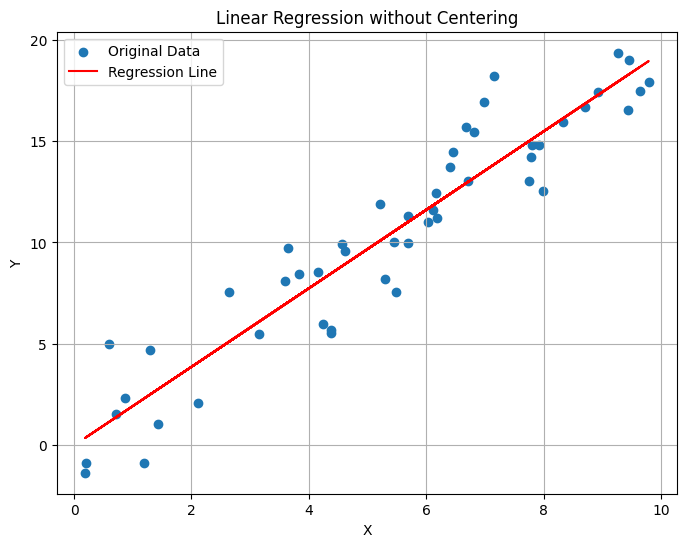

In [8]:
# Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Original Data')

# Fit a linear regression line
coefficients = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(coefficients, x), color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression without Centering')
plt.legend()
plt.grid(True)
plt.show()

Fit to center, and plot linear regression line

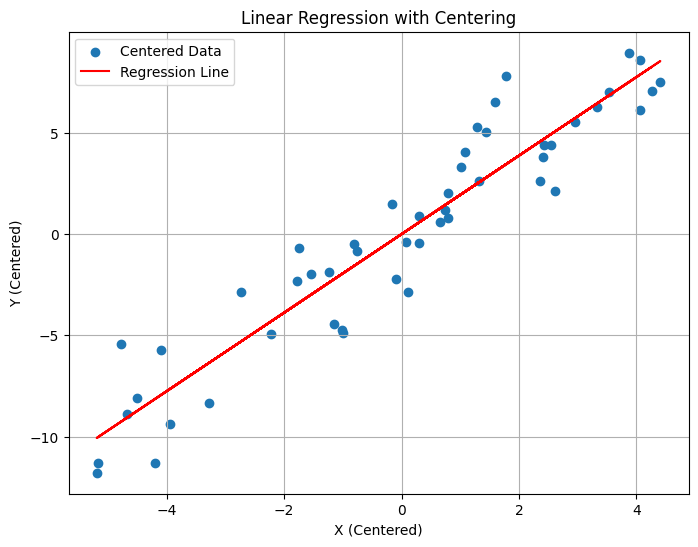

In [9]:
# Center the data
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

# Plot centered data
plt.figure(figsize=(8, 6))
plt.scatter(x_centered, y_centered, label='Centered Data')

# Fit a linear regression line to centered data
coefficients_centered = np.polyfit(x_centered, y_centered, 1)
plt.plot(x_centered, np.polyval(coefficients_centered, x_centered), color='red', label='Regression Line')

plt.xlabel('X (Centered)')
plt.ylabel('Y (Centered)')
plt.title('Linear Regression with Centering')
plt.legend()
plt.grid(True)
plt.show()